In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv(r"C:\Users\stron\Downloads\data (1).csv")

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [7]:
# Выводим типы данных всех столбцов
for column in df.columns:
    print(f"Столбец '{column}': {df[column].dtype}")


Столбец 'Дата': object
Столбец 'Склад': int64
Столбец 'Контрагент': object
Столбец 'Номенклатура': object
Столбец 'Количество': int64


Сразу переведем столбец "Дата" в правильный формат

In [9]:
# Переводим столбец 'Дата' в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

print(df.dtypes)


Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [11]:
# Группируем данные по дате и считаем общее количество продаж на каждую дату
sales_by_date = df.groupby('Дата')['Количество'].sum().reset_index()

# Смотрим результат
print(sales_by_date)


          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [13]:
# Группируем данные по дате и считаем общее количество продаж
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

# Выводим несколько первых строк сгруппированных данных
print(grouped_df.head())


        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

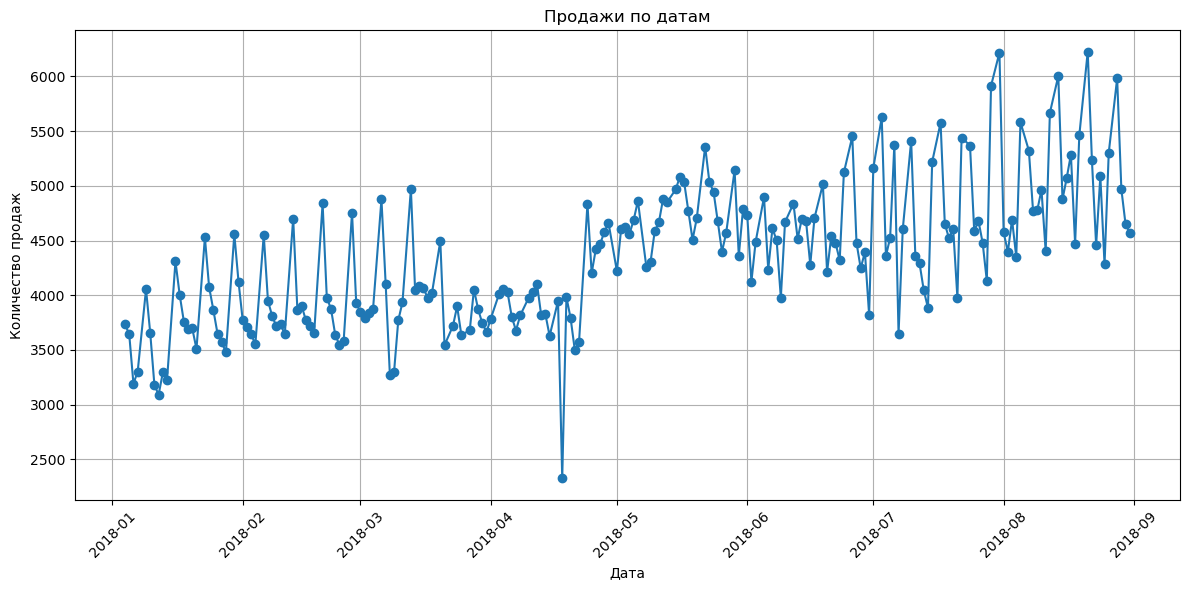

In [15]:
# Строим график продаж по датам
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')

# Добавляем подписи и заголовок
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Показываем график
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Описание графика:
На графике показана динамика количества продаж по датам за период с начала января 2018 года по сентябрь 2018 года.

Что видно:

В начале года (январь–март) продажи держатся примерно в диапазоне от 3000 до 4800 единиц в день.

Начиная с апреля, наблюдается резкий скачок и увеличение среднего уровня продаж.

В мае — один сильный провал (около 2400 продаж в день), после которого показатели снова быстро растут.

С июня по август виден устойчивый рост продаж:
— Пики достигают 6000 и выше.
— Продажи становятся более нестабильными — колебания от дня к дню усиливаются.

Ближе к августу-сентябрю — на графике остаётся высокая активность и количество продаж.
    
Выводы:
В целом, с начала года до конца лета продажи имеют восходящий тренд.

Есть сезонные колебания — почти каждый месяц наблюдаются спады и подъемы.

Можно предположить, что с апреля начался период повышенного спроса или изменения в ассортименте/условиях продаж.

Пик активности приходится на летние месяцы — воз

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [17]:
# Находим строку с максимальным значением в столбце 'Количество'
outlier_row = df.loc[df['Количество'].idxmax()]

# Выводим найденную строку
print(outlier_row)


Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [22]:
# Добавляем столбец с днем недели
df['День недели'] = df['Дата'].dt.weekday  # Понедельник = 0, Вторник = 1, ..., Воскресенье = 6

# Фильтруем:
# - по 3 складу
# - по месяцам июнь (6), июль (7), август (8)
# - по средам (2)
filtered_df = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['День недели'] == 2)
]

# Группируем по 'Номенклатура' и суммируем продажи
top_product = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

# Сортируем по убыванию
top_product = top_product.sort_values(by='Количество', ascending=False)

# Выводим топовый товар
print(top_product.head(1))



  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

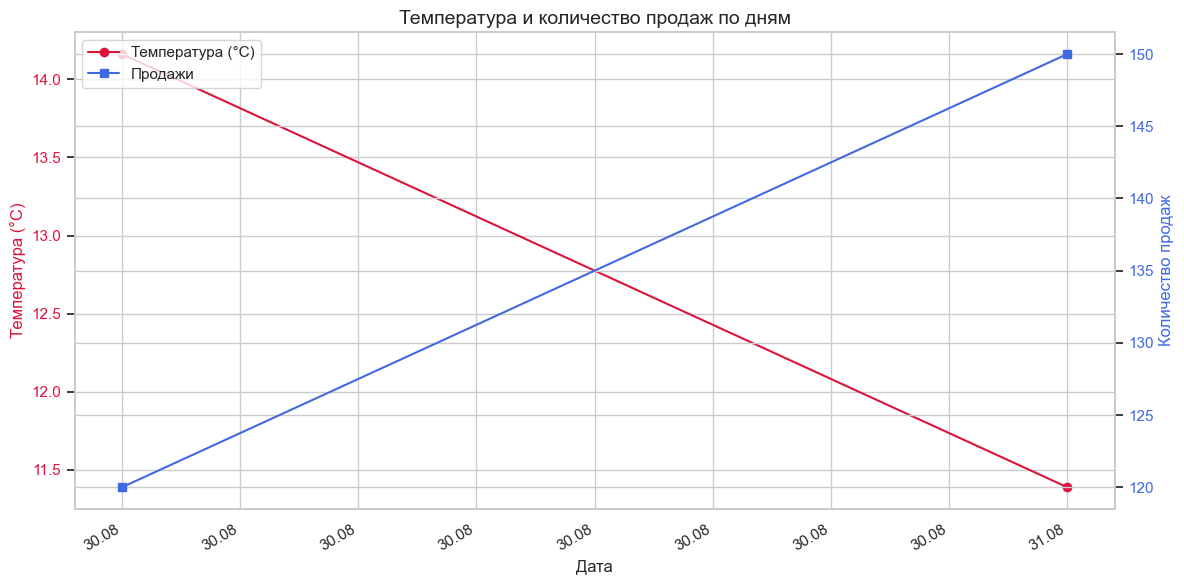

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Стиль графика
sns.set(style="whitegrid")

# 1. Загрузка погодных данных
weather_df = pd.read_excel(r"C:\Users\stron\Downloads\weather.xls")
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], dayfirst=True)

# 2. Средняя температура по дню
daily_weather = weather_df.groupby('Дата')['T'].mean().reset_index()
daily_weather.rename(columns={'T': 'Температура'}, inplace=True)

# 3. Примерные данные по продажам
sales_data = {
    'Дата': ['30.08.2018', '31.08.2018'],
    'Количество продаж': [120, 150]
}
grouped_df = pd.DataFrame(sales_data)
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], dayfirst=True)

# 4. Объединение
merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='inner')

# 5. Построение графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Линия температуры
ax1.plot(merged_df['Дата'], merged_df['Температура'], color='crimson', marker='o', label='Температура (°C)')
ax1.set_ylabel('Температура (°C)', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

# Формат оси X
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.set_xlabel('Дата')

# Вторая ось Y — продажи
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['Количество продаж'], color='royalblue', marker='s', label='Продажи')
ax2.set_ylabel('Количество продаж', color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

# Заголовок и сетка
plt.title('Температура и количество продаж по дням', fontsize=14)
fig.autofmt_xdate()

# Общая легенда
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()
